In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_path = "KDDTrain+.txt"
test_path = "KDDTest+.txt"

traindf = pd.read_csv(train_path, header=None)
testdf  = pd.read_csv(test_path,  header=None)

feature_names = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root',
    'num_file_creations','num_shells','num_access_files',
    'num_outbound_cmds','is_host_login','is_guest_login','count',
    'srv_count','serror_rate','srv_serror_rate','rerror_rate',
    'srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate',
    'attack','label'
]

traindf.columns = feature_names
testdf.columns  = feature_names



In [2]:
dos_attacks = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop',
               'apache2', 'mailbomb', 'processtable', 'udpstorm',
               'worm', 'buffer_overflow']
probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']
r2l_attacks = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop',
               'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop',
               'snmpgetattack', 'snmpguess', 'httptunnel', 'sendmail', 'named']
u2r_attacks = ['rootkit', 'perl', 'loadmodule', 'ps', 'sqlattack']

def map_attack_category(label: str) -> str:
    if label in dos_attacks:
        return "DoS"
    elif label in probe_attacks:
        return "Probe"
    elif label in r2l_attacks:
        return "R2L"
    elif label in u2r_attacks:
        return "U2R"
    elif label == "normal":
        return "normal"
    else:
        return "other"

traindf["attack_category"] = traindf["attack"].apply(map_attack_category)
testdf["attack_category"]  = testdf["attack"].apply(map_attack_category)


<Axes: xlabel='attack_category', ylabel='count'>

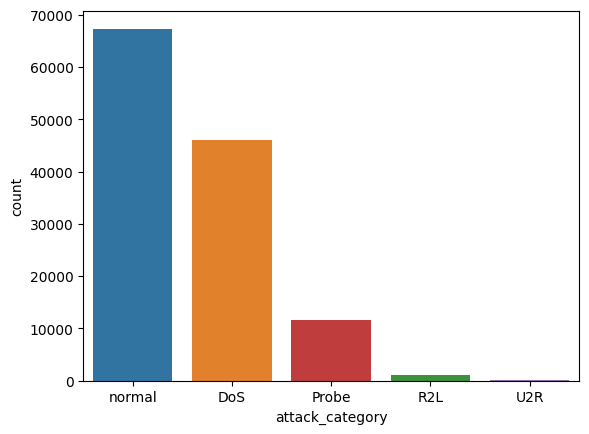

In [4]:
sns.countplot(
    data=traindf,
    x="attack_category",
    hue="attack_category",
    legend=False,
    order=traindf["attack_category"].value_counts().index
)


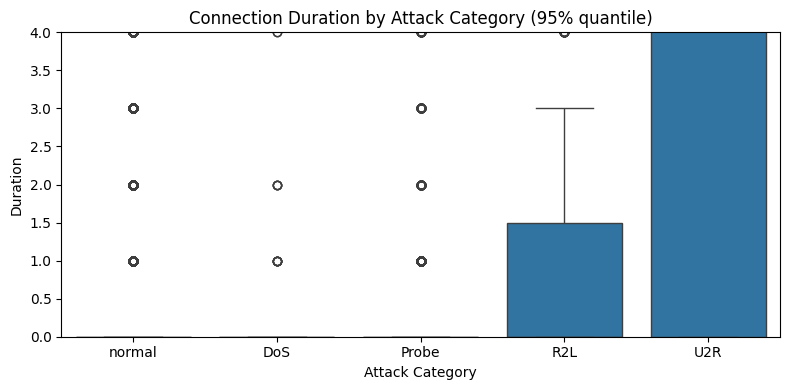

In [5]:
plt.figure(figsize=(8,4))
sns.boxplot(data=traindf, x="attack_category", y="duration",
            order=traindf["attack_category"].value_counts().index)
plt.ylim(0, traindf["duration"].quantile(0.95))  # clip extreme outliers
plt.title("Connection Duration by Attack Category (95% quantile)")
plt.xlabel("Attack Category")
plt.ylabel("Duration")
plt.tight_layout()
plt.show()

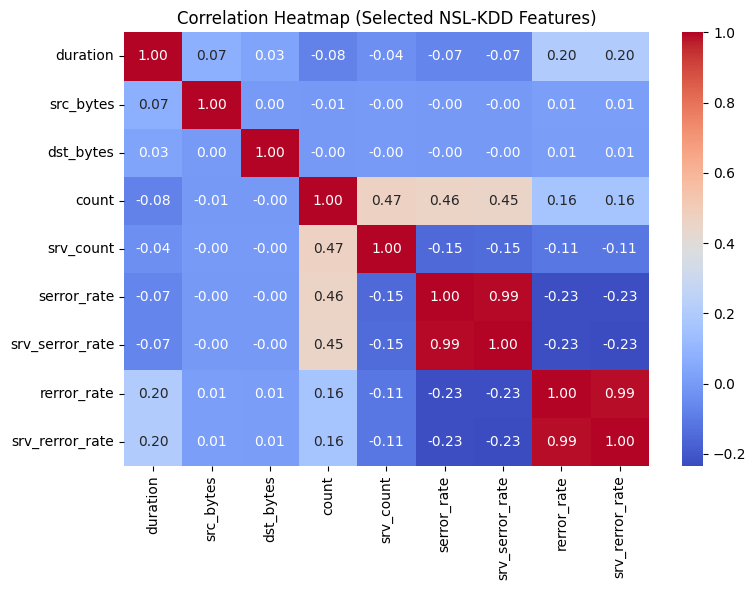

In [6]:
numeric_cols = [
    "duration", "src_bytes", "dst_bytes", "count", "srv_count",
    "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate"
]

plt.figure(figsize=(8,6))
corr = traindf[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Selected NSL-KDD Features)")
plt.tight_layout()
plt.show()


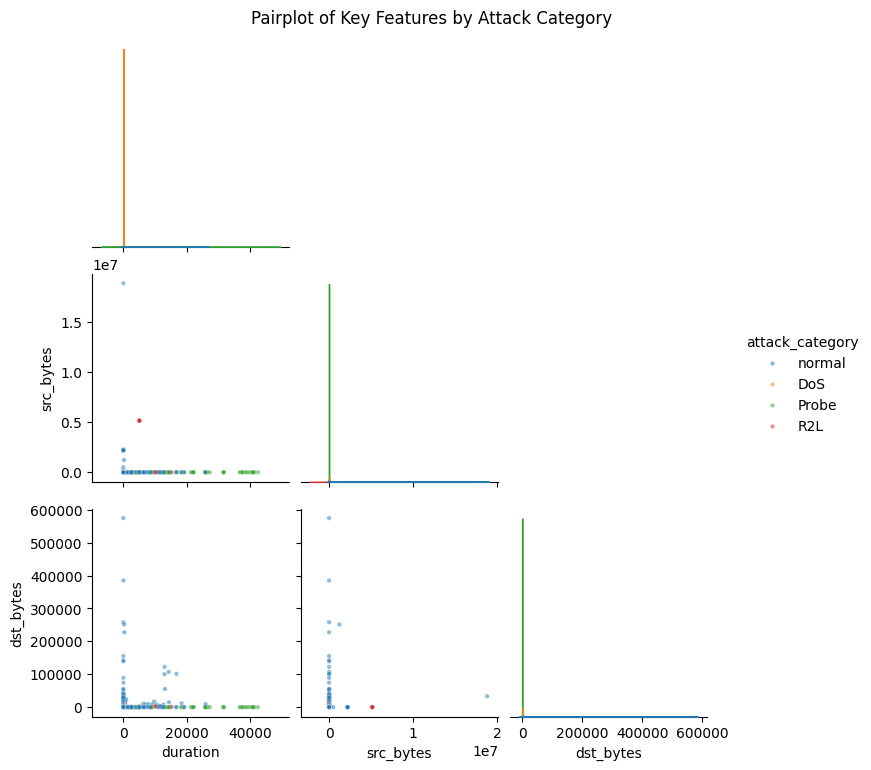

In [7]:
sample = traindf.sample(n=5000, random_state=42)  # to keep it fast
sns.pairplot(sample,
             vars=["duration", "src_bytes", "dst_bytes"],
             hue="attack_category",
             corner=True,
             plot_kws={"alpha": 0.5, "s": 10})
plt.suptitle("Pairplot of Key Features by Attack Category", y=1.02)
plt.show()